In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

%matplotlib inline

In [2]:
# Data Values :

x_values = np.array([0.3, 1.5, 2.4, 4.7, 3.2, 5.2, 7.1]).reshape(7, 1)
y_values = np.array([1.9, 2.11, 3.65, 3.8, 4.7, 2.43, 6.8]).reshape(7, 1)

### Mean Square Error : Cost Function 

### $$ \frac{1}{n} \sum_{i=1}^{n} \big( y -\hat{y} \big)^2 $$

In [3]:
def MSE(y, y_hat):
    mse_calc = np.average((y - y_hat)**2)
    return mse_calc

### 3D Diagram of Cost  wrt. Theta 0 and Theta 1

In [4]:
# Creating theta Values :

n = 200
t0 = np.linspace(-1, 3, n)
t1 = np.linspace(-1, 3, n)

t0, t1 = np.meshgrid(t0, t1)

cost_values = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        y_hat = t0[i][j] + t1[i][j] * x_values
        cost_values[i][j] = MSE(y_values, y_hat)

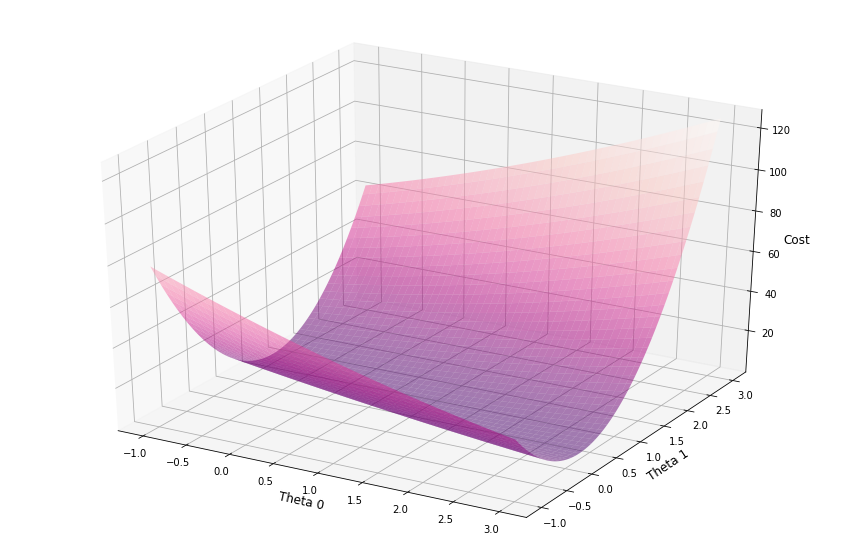

In [5]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection = '3d')

ax.set_xlabel('Theta 0', fontsize=12)
ax.set_ylabel('Theta 1', fontsize=12)
ax.set_zlabel('Cost', fontsize=12)
ax.plot_surface(t0, t1, cost_values, cmap=cm.RdPu_r, alpha=0.5)
plt.show()

In [6]:
# Getting the indices of theta0, theta1 where minimum occurs : 

min_index = np.unravel_index(indices=cost_values.argmin(), shape=cost_values.shape)
print('Minimun Cost occurs at Theta 0 : ', t0[77][135])
print('Minimun Cost occurs at Theta 1 : ', t1[77][135])
print('Min Cost is : ', cost_values[77][135])

Minimun Cost occurs at Theta 0 :  1.71356783919598
Minimun Cost occurs at Theta 1 :  0.5477386934673367
Min Cost is :  1.1866544405444304


## Plotting Gradient Descent 

### $$ \frac{\partial MSE}{\partial \theta_0} = \frac{-2}{n} \sum_{i=1}^{n} \big(y_i - \theta_0 - \theta_1 x_i \big) $$

### $$ \frac{\partial MSE}{\partial \theta_1} = \frac{-2}{n} \sum_{i=1}^{n} \big(y_i - \theta_0 - \theta_1 x_i \big) (x_i) $$

In [7]:
def partial_deriv(x, y, thetas):
    n = y.size
    theta0 = (-2/n) * sum(y - thetas[0] - thetas[1] * x)
    theta1 = (-2/n) * sum((y - thetas[0] - thetas[1] * x) * x)
    return np.append(theta0, theta1, axis=0)

In [8]:
# Gradient Descent Algorithm : 

current_thetas = np.array([-0.2, 1.7])   # INITIAL VALUES
learning_rate = 0.01
theta_values = current_thetas.reshape(1, 2)

for i in range(1000):
    current_thetas = current_thetas - learning_rate * partial_deriv(x_values, y_values, current_thetas)
    theta_values = np.append(theta_values, current_thetas.reshape(1, 2), axis=0)
  

Minimun Cost occurs at Theta 0 :  1.7263326666578558
Minimun Cost occurs at Theta 1 :  0.5445569240709528
Min Cost is :  1.1865332192652613


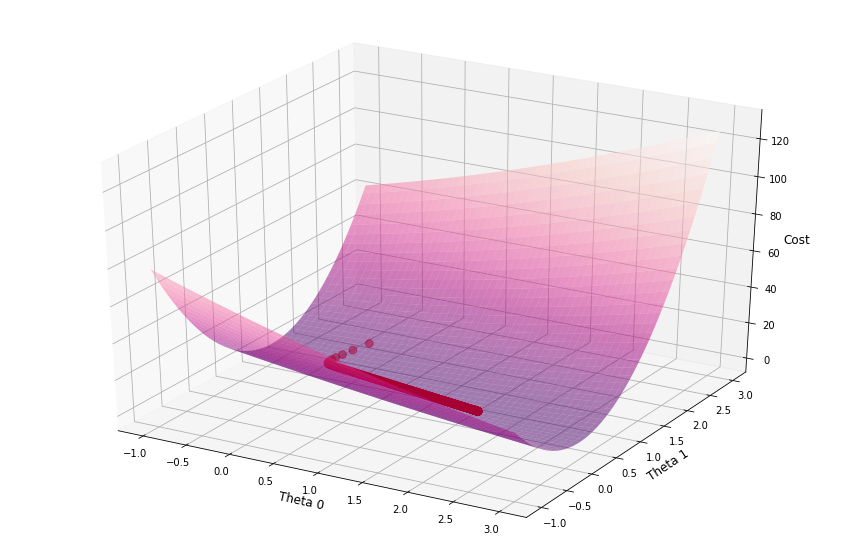

In [9]:
print('Minimun Cost occurs at Theta 0 : ', current_thetas[0])
print('Minimun Cost occurs at Theta 1 : ', current_thetas[1])
print('Min Cost is : ', MSE(y_values, current_thetas[0] + current_thetas[1] * x_values)) 

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection = '3d')

ax.set_xlabel('Theta 0', fontsize=12)
ax.set_ylabel('Theta 1', fontsize=12)
ax.set_zlabel('Cost', fontsize=12)
ax.plot_surface(t0, t1, cost_values, cmap=cm.RdPu_r, alpha=0.5)
ax.scatter(theta_values[:,0], theta_values[:,1], 
           MSE(y_values, theta_values[:, 0] + theta_values[:, 1] * x_values), s=60, color='red', alpha=0.5)

plt.show()